### **ECE2112 - EXPLORATORY DATA ANALYSIS ON SPOTIFY 2023 DATASET**

##### DE LEON, Maria Nichole Lexanie C.
##### 2ECE-C

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### **OVERVIEW OF THE DATASET**

In [44]:
# Load the dataset

data = pd.read_excel('spotify.xlsx')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [57]:
# Check for data types and missing values
print(data.info())

# Identify columns with missing values
missing_values = data.isnull().sum()
missing = missing_values[missing_values > 0]

# Create a DataFrame to display missing value information
missing = missing.reset_index()
missing.columns = ['Column', 'Missing Values']
missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

,Column,Missing Values
0,in_shazam_charts,50
1,key,95


##### BASIC DESCRIPTIVE STATISTICS

In [87]:
# Convert 'streams' column to numeric, handling non-numeric values
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Calculate the mean, median, standard deviation
mean = data['streams'].mean()
median = data['streams'].median()
standard = data['streams'].std()

# Create a DataFrame of the result
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    '': [mean, median, standard]
})
pd.set_option('display.float_format', '{:.9f}'.format)

stats_df

,Statistic,
0,Mean,514137424.939075649
1,Median,290530915.000000000
2,Standard Deviation,566856949.038883209


In [189]:
year = data['released_year'].sort_index()
artist = data['artist_count'].value_counts()

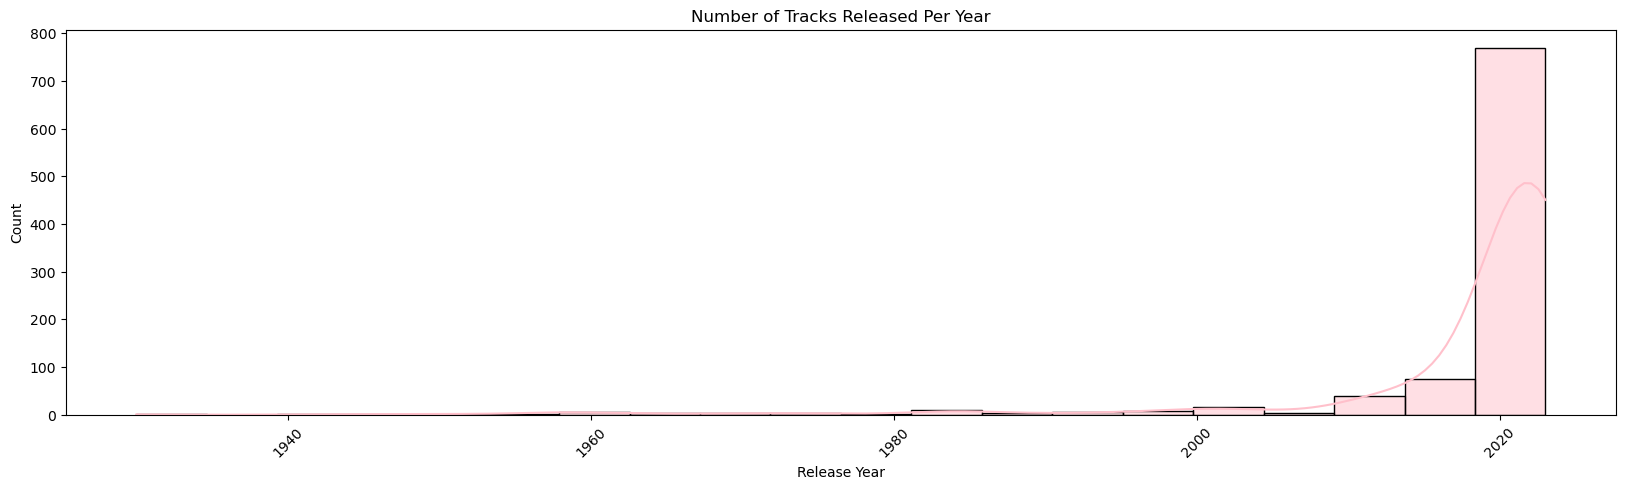

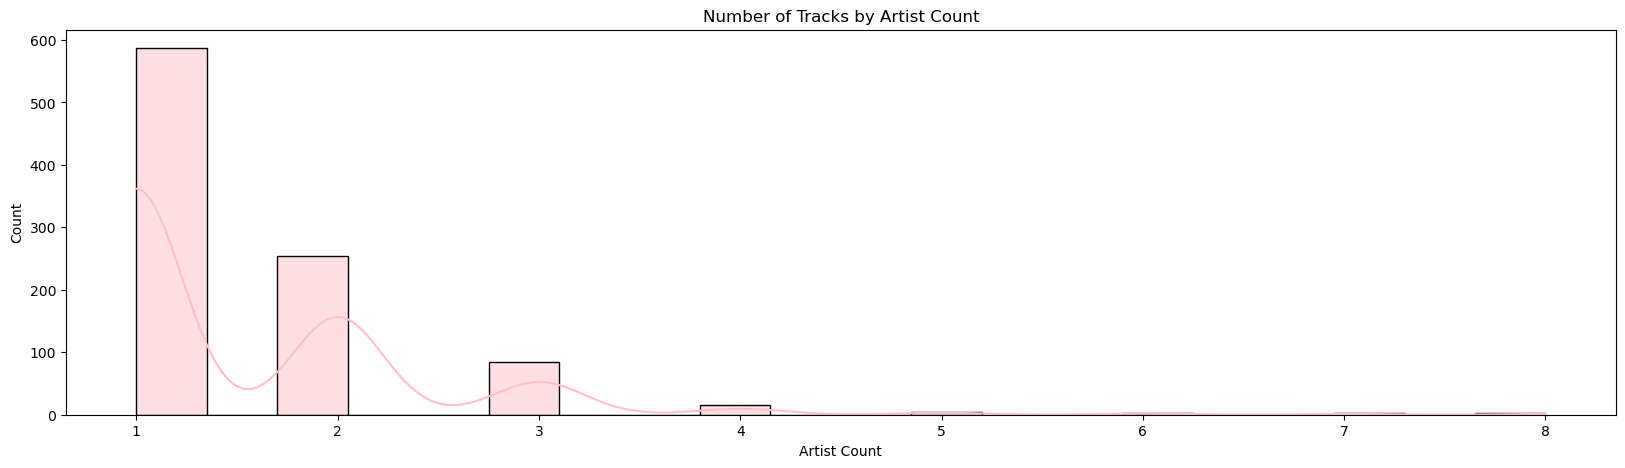

In [421]:
# Count the number of tracks released in each year
year_counts = year.sort_index()

# Create the histogram
plt.figure(figsize=(20, 5))
sns.histplot(data['released_year'], bins=20, kde=True, color = 'pink')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the number of tracks with different artist counts
artist_counts = data['artist_count'].value_counts().sort_index()

# Create a histogram plot to visualize the distribution
plt.figure(figsize=(20, 5))
sns.histplot(data['artist_count'], bins=20, kde= True, color='pink')
plt.title('Number of Tracks by Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Count')
plt.show()

##### **TOP PERFORMERS**

In [266]:
# Print the top 5 most streamed tracks 
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
top_tracks = data.nlargest(5, 'streams')
top_tracks


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074.000000000,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890.000000000,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814.000000000,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672.000000000,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550.000000000,372,...,90,D,Major,76,91,50,54,0,7,5


In [268]:
# Print the Top 5 artist based on the number of tracks
top_artists = data['artist(s)_name'].value_counts().head(5).reset_index()
top_artists

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


##### **TEMPORAL TRENDS**

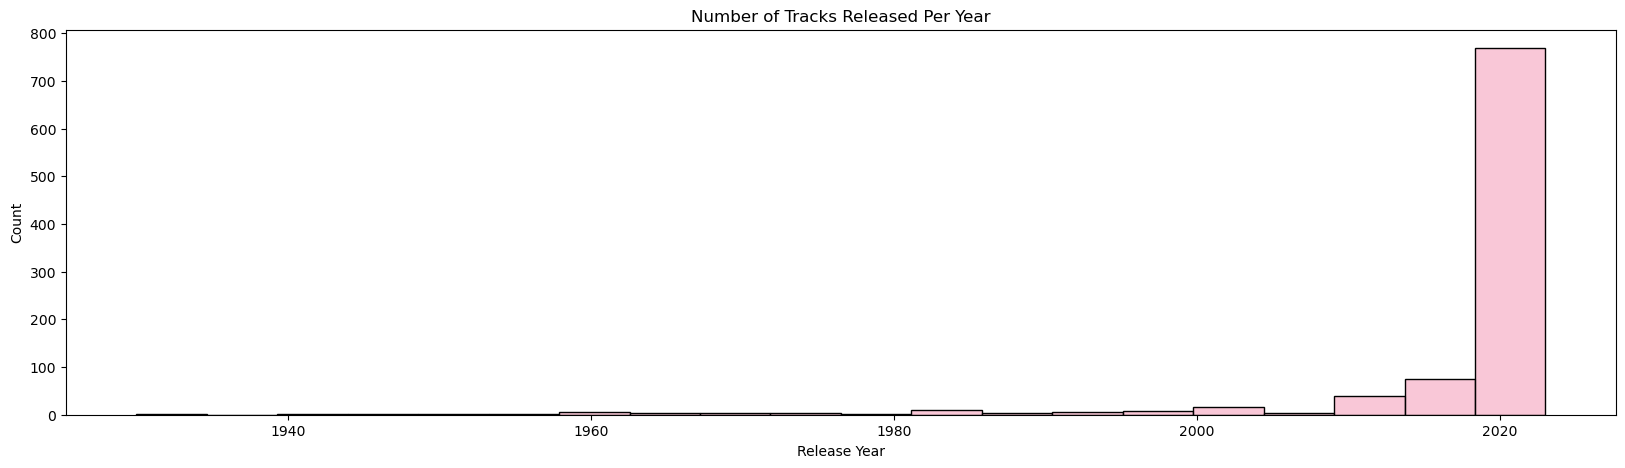

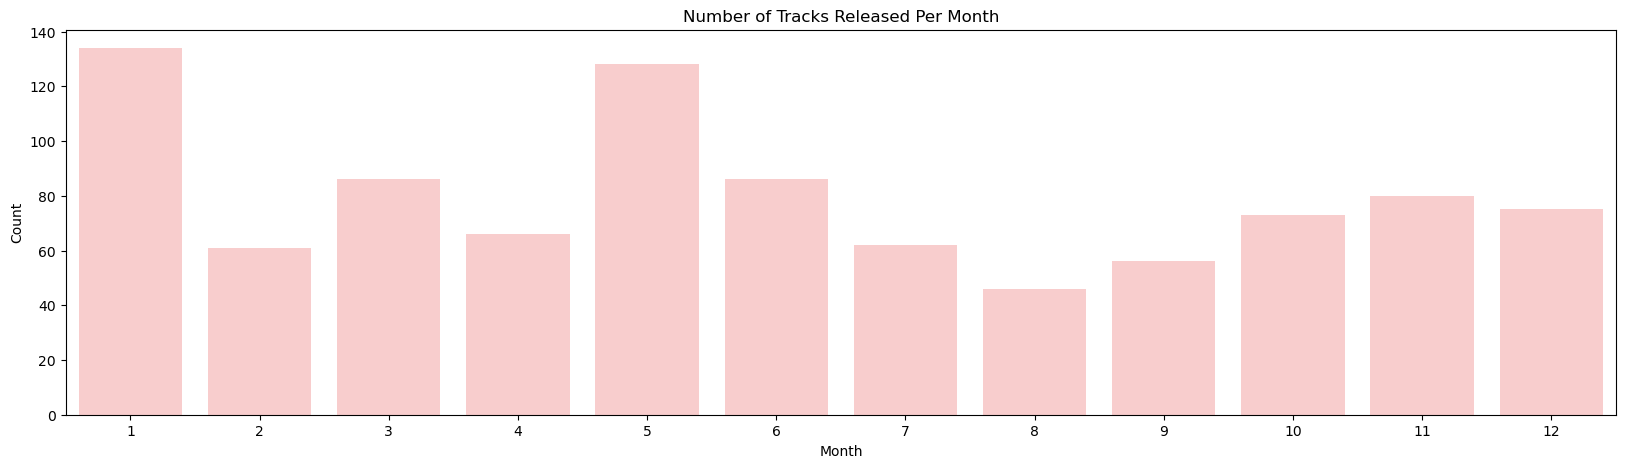

In [425]:
plt.figure(figsize=(20, 5))
sns.histplot(data['released_year'], bins=20, color='#F7B5CA')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(20,5))
sns.countplot(x='released_month', data=data, color='#FFC6C6')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### **GENRE AND MUSIC CHARACTERISTICS**

In [304]:
# Convert to numeric
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['bpm'] = pd.to_numeric(data['bpm'], errors='coerce')
data['danceability_%'] = pd.to_numeric(data['danceability_%'], errors='coerce')
data['energy_%'] = pd.to_numeric(data['energy_%'], errors='coerce')
data['valence_%'] = pd.to_numeric(data['valence_%'], errors='coerce')
data['acousticness_%'] = pd.to_numeric(data['acousticness_%'], errors='coerce')

Correlation matrix:
                     streams          bpm  danceability_%     energy_%
streams         1.000000000 -0.002437908    -0.105456884 -0.026051488
bpm            -0.002437908  1.000000000    -0.147094504  0.025794458
danceability_% -0.105456884 -0.147094504     1.000000000  0.198094848
energy_%       -0.026051488  0.025794458     0.198094848  1.000000000


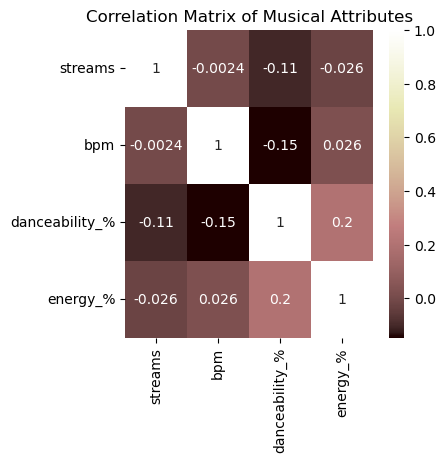

In [322]:
# Correlation Analysis of Streams and Musical Attributes
correlation_matrix = data[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()
print("Correlation matrix:\n", correlation_matrix)

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='pink')
plt.title('Correlation Matrix of Musical Attributes')
plt.show()

Correlation between Danceability and Energy:
                 danceability_%    energy_%
danceability_%     1.000000000 0.198094848
energy_%           0.198094848 1.000000000


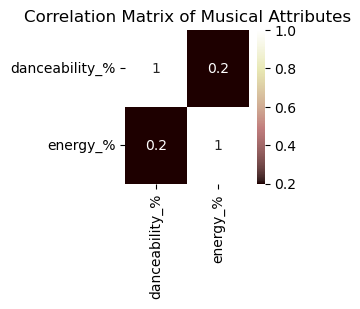

In [324]:
# Correlation Analaysis between danceability_% and energy_%
dance_energy_corr = data[['danceability_%', 'energy_%']].corr()
print("Correlation between Danceability and Energy:\n", dance_energy_corr)

plt.figure(figsize=(2, 2))
sns.heatmap(dance_energy_corr, annot=True, cmap='pink')
plt.title('Correlation of Danceability and Energy')
plt.show()

Correlation between Valence and Acousticness:
                   valence_%  acousticness_%
valence_%       1.000000000    -0.081907275
acousticness_% -0.081907275     1.000000000


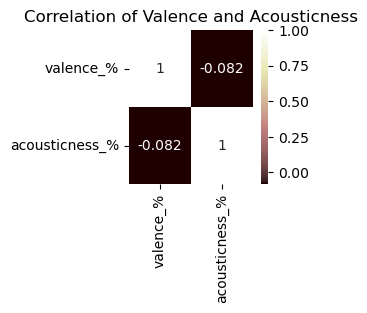

In [328]:
# Correlation Analaysis between valence_% and acousticness_%
val_acous_corr = data[['valence_%', 'acousticness_%']].corr()
print("Correlation between Valence and Acousticness:\n", val_acous_corr)

plt.figure(figsize=(2, 2))
sns.heatmap(val_acous_corr, annot=True, cmap='pink')
plt.title('Correlation of Valence and Acousticness')
plt.show()

##### **PLATFORM POPULARITY**

in_spotify_playlists    4955719
in_spotify_charts         11445
in_apple_playlists        64625
dtype: int64


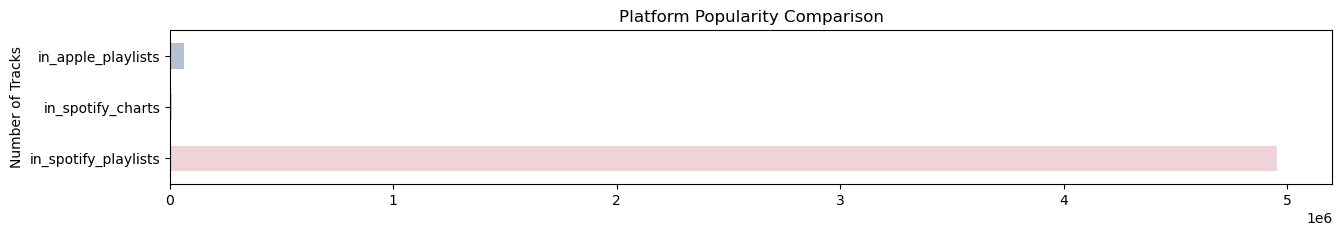

In [456]:
#Comparison of platform popularity
print(data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum())
platform_counts = data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()

# Create a barh plot to show the result neatly
plt.figure(figsize=(15, 2))
platform_counts.plot(kind='barh', color=['#EED3D9', '#CCD3CA', '#B5C0D0'])
plt.title('Platform Popularity Comparison')
plt.ylabel('Number of Tracks')
plt.show()

##### **ADVANCED ANALYSIS**

In [463]:
# Determine the pattern among tracks
key_mode = data.groupby(['key', 'mode']).size()
key_mode

key  mode 
A    Major    42
     Minor    33
A#   Major    27
     Minor    30
B    Major    35
     Minor    46
C#   Major    73
     Minor    47
D    Major    66
     Minor    15
D#   Major    12
     Minor    21
E    Major    17
     Minor    45
F    Major    44
     Minor    45
F#   Major    30
     Minor    43
G    Major    66
     Minor    30
G#   Major    63
     Minor    28
dtype: int64

In [483]:
# Group by artist and sum the appearances for each platform
artist_summary = data.groupby('artist(s)_name').agg({
    'in_spotify_playlists': 'sum',
    'in_spotify_charts': 'sum',
    'in_apple_playlists': 'sum',
    'in_apple_charts': 'sum',
    'in_deezer_playlists': 'sum'
}).reset_index()

# Fill missing values with 0 and convert numeric columns to integer
artist_summary.fillna(0, inplace=True)
artist_summary[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 
                'in_deezer_playlists']] = artist_summary[['in_spotify_playlists', 'in_spotify_charts', 
                                                          'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists']].astype(int)

# Calculate total appearances
artist_summary['total_appearance_count'] = artist_summary[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
                                                           'in_apple_charts', 'in_deezer_playlists']].sum(axis=1)

# Sort by total appearances and display top 5
artist_summary = artist_summary.sort_values(by='total_appearance_count', ascending=False)
artist_summary.head(5)

,artist(s)_name,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,total_appearance_count
572,The Weeknd,144053,180,1677,1348,7551,154809
159,Ed Sheeran,128758,94,1448,488,16952,147740
558,Taylor Swift,132974,542,1796,1866,3086,140264
223,Harry Styles,110026,185,1741,545,3695,116192
171,Eminem,87331,152,475,281,15121,103360
